<h1 style = "color:darkslategray; font-family:Helveitca; font-weight:bolder">
About the Data:
</h1>

##### **Author: KASH** 

#### Description: 
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work e exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

- The dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation).
---

<h1 style = "color:darkslategray; font-family:Helveitca; font-weight:bolder">
About the Notebook Author:
</h1>

I am Minhaj Ur Riyan, a passionate data analyst with a strong interest in data visualization and machine learning. With over 2 years of experience in the field of technology, I strive to combine creativity and analytical thinking in my work. My goal is to uncover insights that drive decision-making and innovation.

In this project, I aimed to analyze app popularity trends based on content ratings to provide actionable insights for developers. I hope this contributes in someone's understanding and study about the app data on playstore.

Feel free to connect with me on my LinkedIn Profile Connect with me on [LinkedIn](https://www.linkedin.com/in/minhaj-ur-riyan-98690431a) .



### Objectives:
I segmented customers in this dummy project to simulate effective marketing strategies and demonstrate the importance of understanding customer needs. By identifying distinct groups, I aimed to illustrate how tailored communications can enhance engagement and satisfaction. This exercise helped me practice resource allocation and focus on valuable segments, while also informing product development. Overall, the segmentation strategy served as a practical example of optimizing approaches to drive growth in a business context.

---

### Key Steps:
- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Clustering algorithms (e.g., K-means)
- Visualization of customer segments


---

### 

## 1. Data Cleaning and Preprocessing: 

In [1]:
# Importing Libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# Load the dataset:
path = r'C:\Users\riyan\OneDrive\Desktop\Internship\Customer Segmentation (K means)\data\Customer Segmentation.csv'
df = pd.read_csv(path)

In [4]:
# View the first five rows of the dataset:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [5]:
# Info about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [24]:
numeric_list = ['Age', 'Work_Experience', 'Family_Size']
categorical_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [6]:
# Shape of the dataset:
df.shape

(2627, 11)

In [8]:
# Dataset description:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


### 1.1 Data Cleaning

In [9]:
# Check for missing values:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

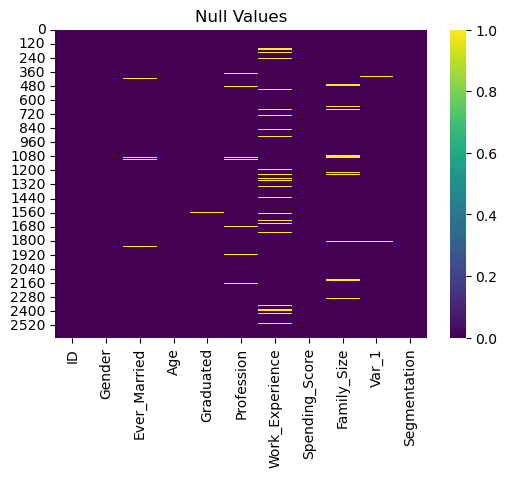

In [13]:
# Null values heatmap:
plt.figure(figsize = (6,4))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Values')
plt.show()

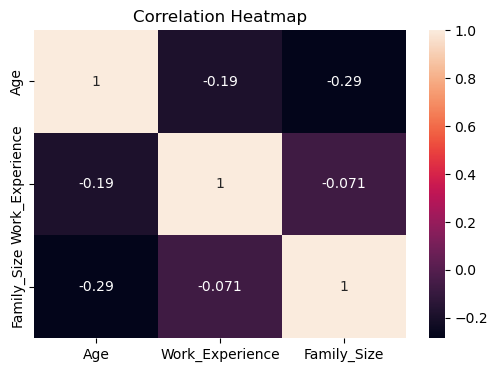

In [20]:
# Correlation heatmap
plt.figure(figsize = (6,4))
sns.heatmap(df[numeric_list].corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

#### Key Observations: 
- The dataset consists of 2067 rows and 11 features.
- 4 of these 11 features are numeric.
- var_1 and segmentation columns are of no use.
- Work_experience, Family_Size and profession seems to have more null values 
among all columns with no visible patterns among these null values.

In [14]:
# Lets print the unique values of each column:
for i in df.columns:
    print(i, df[i].nunique())

ID 2627
Gender 2
Ever_Married 2
Age 67
Graduated 2
Profession 9
Work_Experience 15
Spending_Score 3
Family_Size 9
Var_1 7
Segmentation 4


In [21]:
# Importing the necessary libraries:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer 

In [22]:
# Creating imputers:
imputer = IterativeImputer(random_state=0)
simple_imputer = SimpleImputer(strategy='most_frequent')

In [27]:
# Creating a column transformer:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('imputer', imputer, numeric_list),
    ('simple_imputer', simple_imputer, categorical_list)
])

# Creating a pipeline:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [28]:
imputed_data = pipeline.fit_transform(df)

In [31]:
# Convert the imputed data into a dataframe:

all_features = numeric_list + categorical_list

# Convert back to DataFrame with correct columns
imputed_df = pd.DataFrame(imputed_data, columns=all_features)

In [32]:
imputed_df.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,36.0,0.0,1.0,Female,Yes,Yes,Engineer,Low
1,37.0,8.0,4.0,Male,Yes,Yes,Healthcare,Average
2,69.0,0.0,1.0,Female,Yes,No,Artist,Low
3,59.0,11.0,2.0,Male,Yes,No,Executive,High
4,19.0,3.310561,4.0,Female,No,No,Marketing,Low


In [33]:
# Check for missing values:
imputed_df.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
Gender             0
Ever_Married       0
Graduated          0
Profession         0
Spending_Score     0
dtype: int64

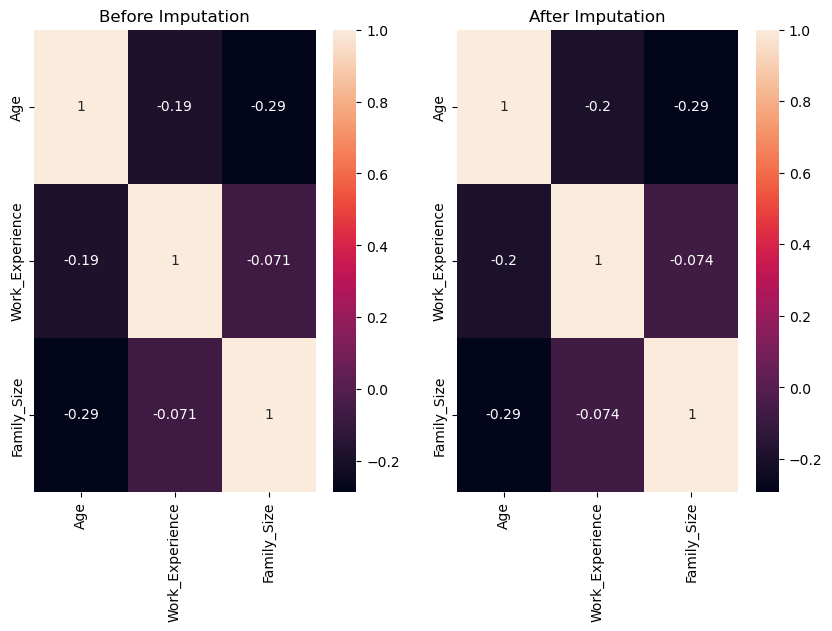

In [41]:
# Correlation heatmap comparison:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(df[numeric_list].corr(), annot = True)
plt.title('Before Imputation')

plt.subplot(1,2,2)
sns.heatmap(imputed_df[numeric_list].corr(), annot = True)
plt.title('After Imputation')
plt.show()

The Correlation is amost unchanged after the imputation.

### 1.2 Feature Engineering

In [42]:
# Shape of the dataset:
imputed_df.shape

(2627, 8)

In [49]:
# Lets see the statistics of the dataset:
imputed_df[numeric_list].describe()

,Age,Work_Experience,Family_Size
count,2627.0,2627.0,2627.0
unique,67.0,192.0,100.0
top,42.0,1.0,2.0
freq,88.0,773.0,768.0


We must be having all columns with data type 'O' after imputation.

In [50]:
# Lets verify the data types:
imputed_df.dtypes

Age                object
Work_Experience    object
Family_Size        object
Gender             object
Ever_Married       object
Graduated          object
Profession         object
Spending_Score     object
dtype: object

In [48]:
imputed_df.value_counts()

Age   Work_Experience  Family_Size  Gender  Ever_Married  Graduated  Profession     Spending_Score
20.0  1.0              3.0          Male    No            No         Healthcare     Low               5
                       5.0          Male    No            No         Healthcare     Low               4
79.0  1.0              2.0          Female  Yes           No         Lawyer         High              4
21.0  1.0              4.0          Male    No            No         Healthcare     Low               4
                       3.0          Male    No            No         Healthcare     Low               4
                                                                                                     ..
35.0  9.0              1.0          Female  No            No         Homemaker      Low               1
                                                          Yes        Artist         Low               1
                       2.0          Female  No            Yes        

In [51]:
# Convert the data types:
imputed_df[numeric_list] = imputed_df[numeric_list].astype('int64')

In [52]:
imputed_df.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000
mean,43.649791,2.498668,2.803578
std,16.967015,3.180693,1.526691
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,3.000000,4.000000
max,89.000000,14.000000,9.000000


The numeric columns are having vastly different ranges.
We need to standardize them.

In [53]:
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
imputed_df[numeric_list] = scaler.fit_transform(imputed_df[numeric_list])

In [54]:
imputed_df.describe()

,Age,Work_Experience,Family_Size
count,2.627000e+03,2.627000e+03,2.627000e+03
mean,1.839243e-16,1.622861e-17,1.054860e-16
std,1.000190e+00,1.000190e+00,1.000190e+00
min,-1.512032e+00,-7.857228e-01,-1.181589e+00
25%,-8.046430e-01,-7.857228e-01,-5.264529e-01
50%,-1.562028e-01,-4.712661e-01,-5.264529e-01
75%,5.511865e-01,1.576473e-01,7.838188e-01
max,2.673354e+00,3.616671e+00,4.059498e+00


---

### 2. Exploratory Data Analysis (EDA):

In [55]:
imputed_df.sample(5)

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
1148,-0.745694,-0.156809,-0.526453,Male,Yes,Yes,Homemaker,Low
1058,-0.450948,-0.785723,1.438955,Male,Yes,No,Executive,Average
2510,-0.981490,0.157647,0.128683,Male,No,Yes,Doctor,Low
2540,-0.804643,1.729931,0.128683,Male,Yes,Yes,Healthcare,High
1884,-0.333050,-0.471266,-1.181589,Female,No,Yes,Engineer,Low


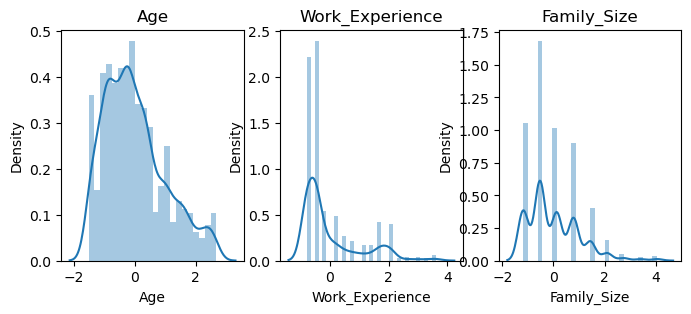

In [70]:
# Lets see the distribution of the data:

plt.figure(figsize = (8,3))
for j,i in enumerate(numeric_list):
    plt.subplot(1,3,j+1)
    sns.distplot(imputed_df[i])
    plt.title(i)

- Age: Right-skewed distribution indicates more younger individuals and fewer older ones.
- Work Experience: Peaks at lower values suggest many individuals have little to no experience.
- Family Size: Moderate right skew indicates most individuals have small families, with fewer larger ones.

However, I would not transform this data for my model. As I don't feel it to be strictly
necessary.

In [71]:
# Lets start with some questions

# Q1: How many males and females are there in the dataset?
imputed_df['Gender'].value_counts()

Gender
Male      1424
Female    1203
Name: count, dtype: int64

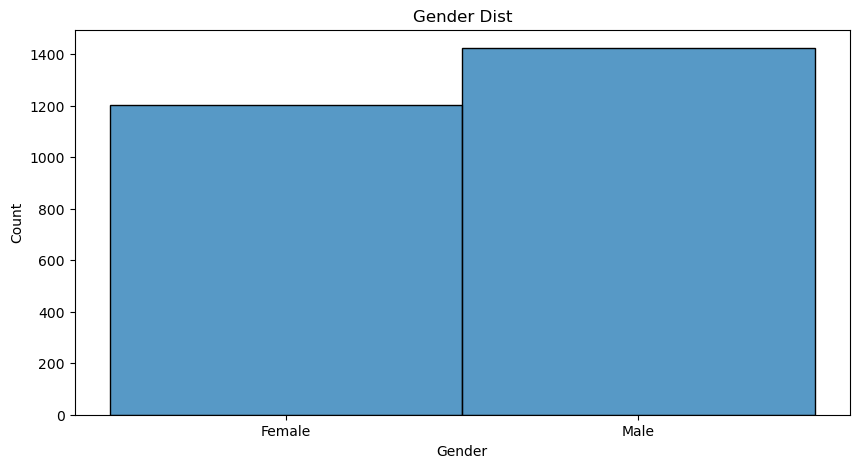

In [78]:
plt.figure(figsize = (10,5))
plt.title('Gender Dist')
sns.histplot(imputed_df, x= 'Gender')
plt.show()

In [73]:
# Q2: How many people are married and unmarried?
imputed_df['Ever_Married'].value_counts()

Ever_Married
Yes    1570
No     1057
Name: count, dtype: int64

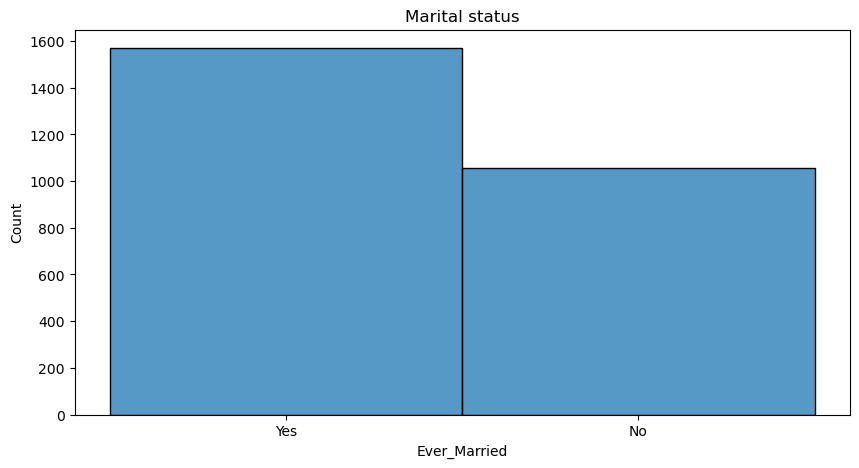

In [79]:
plt.figure(figsize = (10,5))
plt.title('Marital status')
sns.histplot(imputed_df, x= 'Ever_Married')
plt.show()

In [80]:
# Q.3 How many people are graduated and not graduated?
imputed_df['Graduated'].value_counts()

Graduated
Yes    1626
No     1001
Name: count, dtype: int64

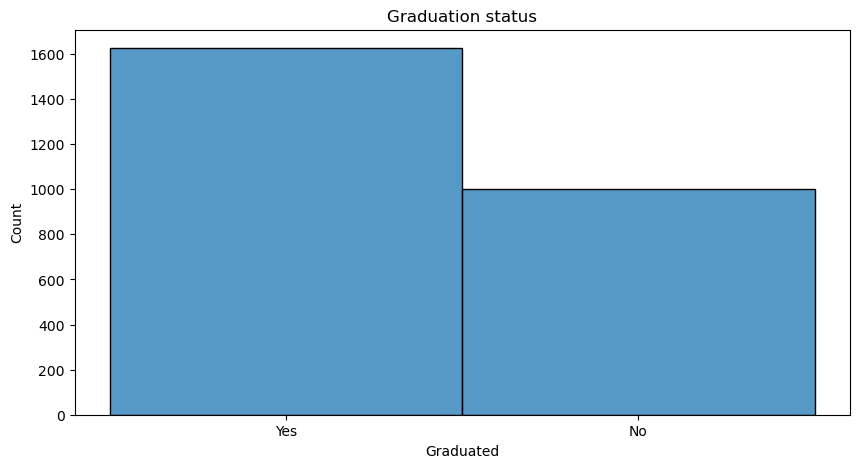

In [81]:
plt.figure(figsize = (10,5))
plt.title('Graduation status')
sns.histplot(imputed_df, x= 'Graduated')
plt.show()

In [90]:
# Q.4 Which gender is more likey to spend more?
score_gender = imputed_df.groupby('Gender')['Spending_Score'].value_counts()
score_gender


Gender  Spending_Score
Female  Low               772
        Average           272
        High              159
Male    Low               844
        Average           353
        High              227
Name: count, dtype: int64

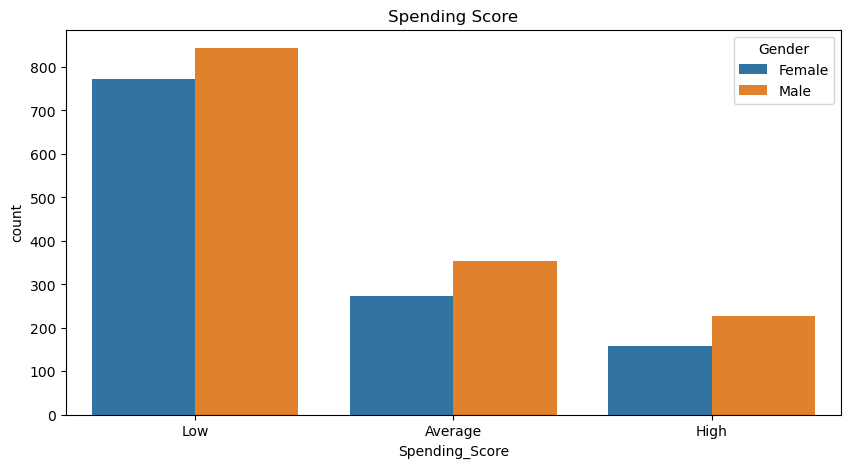

In [105]:
plt.figure(figsize = (10,5))
plt.title('Spending Score')
sns.countplot(data = imputed_df, x = 'Spending_Score', hue = 'Gender')
plt.show()

Males seem to spend more than Females.

In [82]:
imputed_df.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,-0.450948,-0.785723,-1.181589,Female,Yes,Yes,Engineer,Low
1,-0.391999,1.729931,0.783819,Male,Yes,Yes,Healthcare,Average
2,1.494372,-0.785723,-1.181589,Female,Yes,No,Artist,Low
3,0.904881,2.673301,-0.526453,Male,Yes,No,Executive,High
4,-1.453083,0.157647,0.783819,Female,No,No,Marketing,Low


In [106]:
# Q.5 What is the relation between Ever_Married and Spending?

imputed_df.groupby('Ever_Married')['Spending_Score'].value_counts()

Ever_Married  Spending_Score
No            Low               1057
Yes           Average            625
              Low                559
              High               386
Name: count, dtype: int64

<Axes: xlabel='Spending_Score', ylabel='count'>

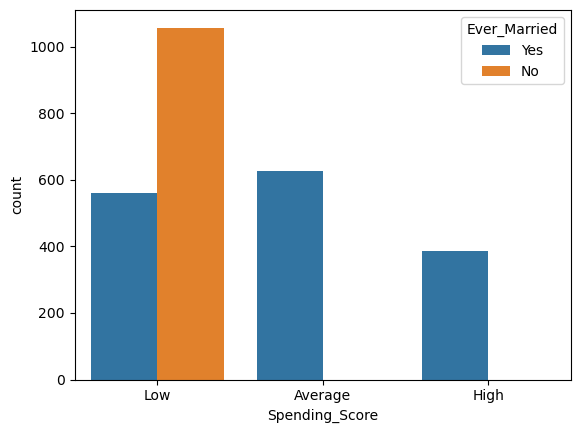

In [107]:
sns.countplot(data = imputed_df, x = 'Spending_Score', hue = 'Ever_Married')
plt.title('Relation between Marital status and Spending')
plt.show()

People who arenot married are more likely to live alone compared to married people
and hence they spend a lot less compared to married people.

In [108]:
# Q.6 What is the relation between Graduated and Spending?
imputed_df.groupby('Graduated')['Spending_Score'].value_counts()

Graduated  Spending_Score
No         Low               694
           Average           167
           High              140
Yes        Low               922
           Average           458
           High              246
Name: count, dtype: int64

<Axes: xlabel='Spending_Score', ylabel='count'>

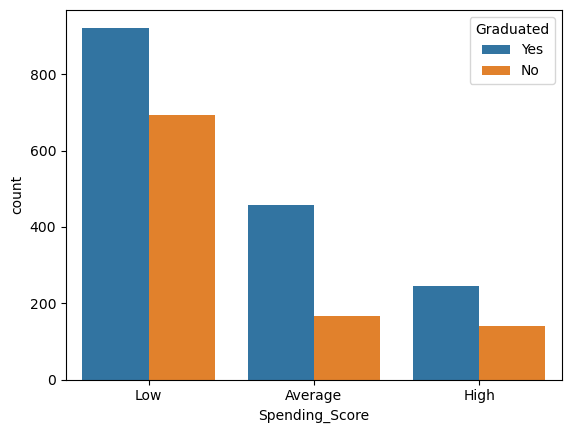

In [119]:
sns.countplot(data = imputed_df, x = 'Spending_Score', hue = 'Graduated')

Graduates spend a lot more than ungraduated people.

In [123]:
# Q.7 What is the relation between Age and Spending?
# And does spending go up with age?

imputed_df.groupby('Spending_Score')['Age'].mean()

Spending_Score
Average    0.215601
High       0.933745
Low       -0.306421
Name: Age, dtype: float64

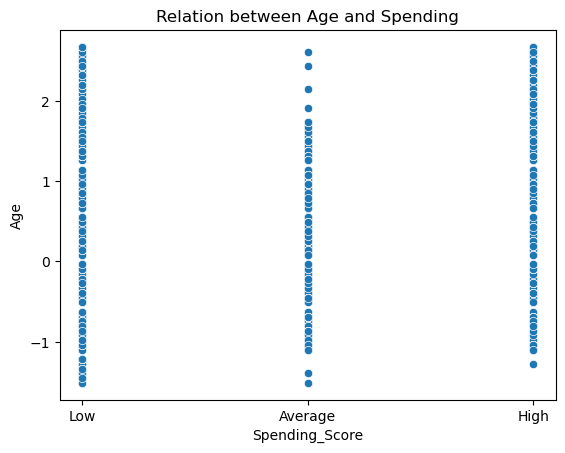

In [126]:
# Lets analyze it using a scatter plot:
sns.scatterplot(imputed_df, x = 'Spending_Score', y = 'Age')
plt.title('Relation between Age and Spending')
plt.show()

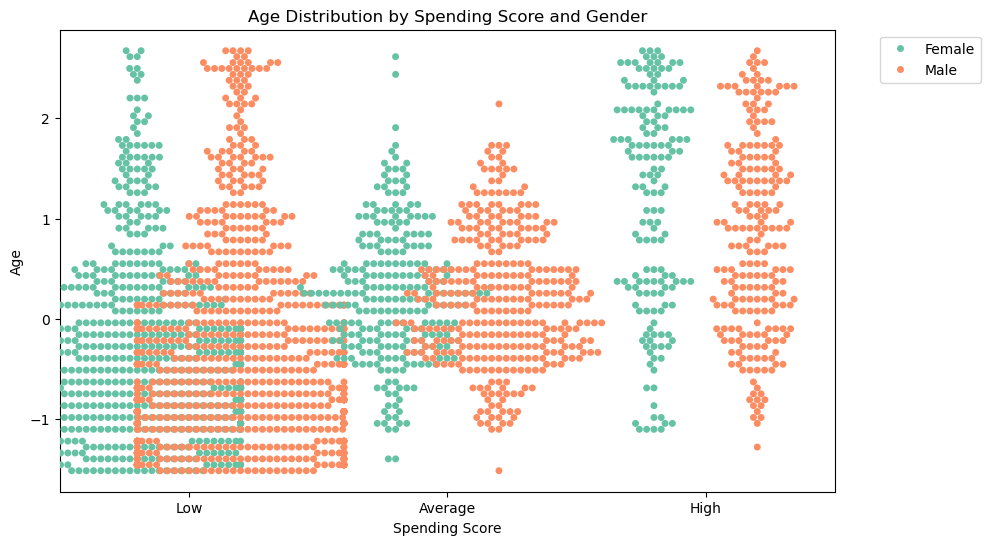

In [136]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=imputed_df, x='Spending_Score', y='Age', hue='Gender', dodge=True, palette='Set2')

# Labels and title
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.title('Age Distribution by Spending Score and Gender')

# move legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)
# Show plot
plt.show()

No clear relationship between age and spending can be observed, multiple individuals share the same age within each spending category.

Young people are clustered more around lower values, while as age increases the clusters
are more uniformly present across all spending categories.

In [114]:
imputed_df.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score
0,-0.450948,-0.785723,-1.181589,Female,Yes,Yes,Engineer,Low
1,-0.391999,1.729931,0.783819,Male,Yes,Yes,Healthcare,Average
2,1.494372,-0.785723,-1.181589,Female,Yes,No,Artist,Low
3,0.904881,2.673301,-0.526453,Male,Yes,No,Executive,High
4,-1.453083,0.157647,0.783819,Female,No,No,Marketing,Low


### 3. Clustering Using K-Means

In [145]:
# importing KMeans
from sklearn.cluster import KMeans

In [148]:
# Categorial columns

from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
ordinal_col = 'Spending_Score'

# One-hot encoding for nominal categorical columns
imputed_df = pd.get_dummies(imputed_df, columns=categorical_cols, drop_first=True)

# Label encoding for the ordinal variable
label_encoder = LabelEncoder()
imputed_df[ordinal_col] = label_encoder.fit_transform(imputed_df[ordinal_col])

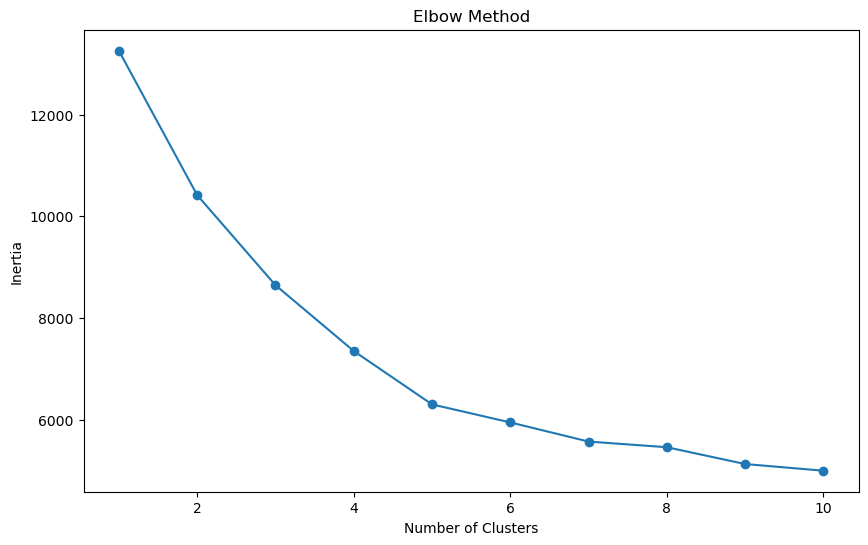

In [152]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(imputed_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Key points:
- The optimal number of clusters seems to be either 7 or 8. 
- I would go with 7 just to avoid overfitting.

In [154]:
# Fitting K-Means to the dataset (using k = 7)
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(imputed_df)

KMeans(n_clusters=7, random_state=0)

In [155]:
# Fit the kmeans object to the dataset
imputed_df['Cluster'] = kmeans.labels_

### 4. Cluster Visualization

In [156]:
# Reducing features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(imputed_df)

In [157]:
# Create a DataFrame for the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_df['Cluster'] = kmeans.labels_  # Add cluster labels

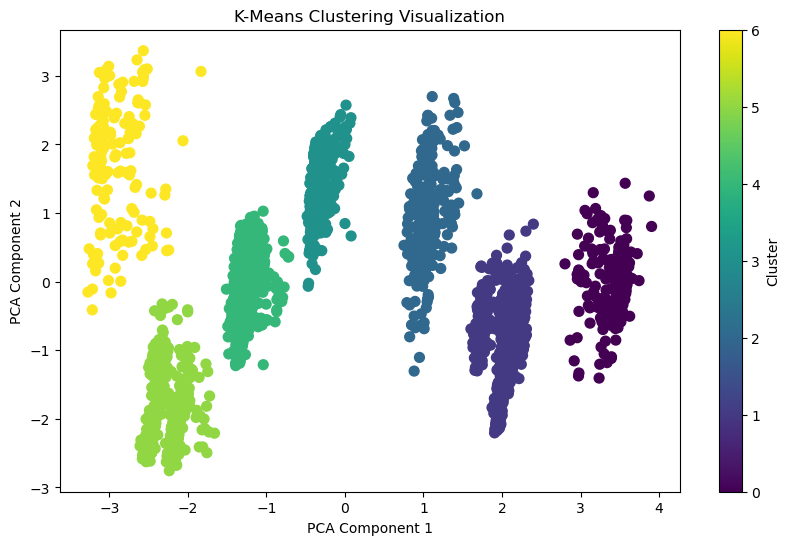

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=reduced_df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [159]:
# Cluster Summary
cluster_summary = imputed_df.groupby('Cluster').mean()  
print(cluster_summary)

              Age  Work_Experience  Family_Size  Spending_Score  Gender_Male  \
Cluster                                                                        
0       -0.058901         1.582174     0.002392        0.319277     0.536145   
1        0.285334        -0.461957     0.249366        0.187500     0.603618   
2       -0.470097         1.922210    -0.480552        1.996815     0.429936   
3       -1.048360        -0.403388     0.638073        1.995595     0.572687   
4       -0.195537        -0.397574    -0.743269        1.966011     0.477639   
5        1.762323        -0.512465    -0.642065        1.483957     0.572193   
6       -0.591728         0.076964     2.400108        1.736842     0.605263   

         Ever_Married_Yes  Graduated_Yes  Profession_Doctor  \
Cluster                                                       
0                1.000000       0.734940           0.114458   
1                1.000000       0.754934           0.087171   
2                0.292994  

In [162]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(imputed_df, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3336474293947257


In [161]:
imputed_df.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
0,-0.450948,-0.785723,-1.181589,2,False,True,True,False,True,False,False,False,False,False,False,4
1,-0.391999,1.729931,0.783819,0,True,True,True,False,False,False,False,True,False,False,False,0
2,1.494372,-0.785723,-1.181589,2,False,True,False,False,False,False,False,False,False,False,False,5
3,0.904881,2.673301,-0.526453,1,True,True,False,False,False,False,True,False,False,False,False,0
4,-1.453083,0.157647,0.783819,2,False,False,False,False,False,False,False,False,False,False,True,3


---
# **Summary**

I performed K-Means clustering on my prepared DataFrame, fitting the model with 7 clusters. After scaling numerical features and one-hot encoding categorical variables, I used PCA to reduce the dimensionality for visualization. The scatter plot showed distinct clusters, indicating effective separation. 

# Next Steps: 

Next, the characteristics of each cluster  can be analyzed using summary statistics and  visualizing centroids for further insights. This process will help to understand the data's structure and potential trends better.



---

*End of Notebook*

- If you find any correction in my work, or want to ask anything about the process,
Please feel free to ask!